### Import

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import imageio
import pickle
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Reshape, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from sklearn.decomposition import PCA

### Parameters

In [4]:
image_size = 64 
latent_dim = 10
vector_size = image_size * image_size

### Get All Files

In [5]:
myfiles = []
for root, dirs, files in os.walk("../../data/celeba/pickle", topdown=False):
    for name in files:
        if '.p' in name:
            myfiles.append(os.path.join(root, name))
myfiles = np.sort(myfiles)

### Load a few of the files in for exploration

In [6]:
X = []
for i in range(32):
    loadddata = pickle.load( open(myfiles[0], "rb" ))
    X.append(loadddata['X'])
X = np.array(X)
X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
X = X / 255.0

KeyboardInterrupt: 

### Plot a few faces

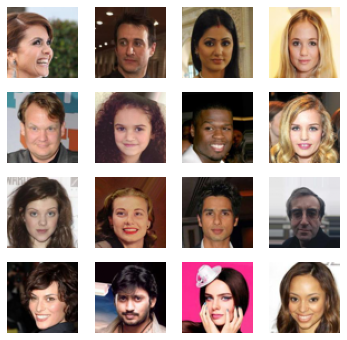

In [5]:
plt.figure(figsize=(6,6))
for i in range(16):
    randind = np.random.randint(X.shape[0])
    im = X[randind,:]
    im = np.reshape(im,(64,64,3))
    plt.subplot(4,4,i+1)
    plt.imshow(im)
    plt.axis('off')

### Run a subset through the PCA

In [ ]:
pca = PCA(n_components=16)
C = pca.fit_transform(X.T)

### Reconstruct using random weights

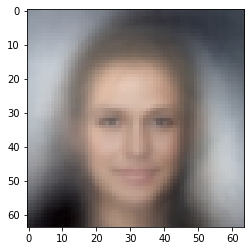

In [45]:
c0 = C[:,0].copy()
c1 = C[:,6].copy()
c2 = C[:,7].copy()

n0 = c0 + c1*-4.0 + c2*4.0
n0 = np.reshape(n0,(64,64,3))
minval = np.min(n0)
maxval = np.max(n0)
maxext = np.max([np.abs(minval),np.abs(maxval)])
n0 = (n0 / maxext * 0.5) + 0.5
plt.imshow(n0);

### Load new image to reconstruct

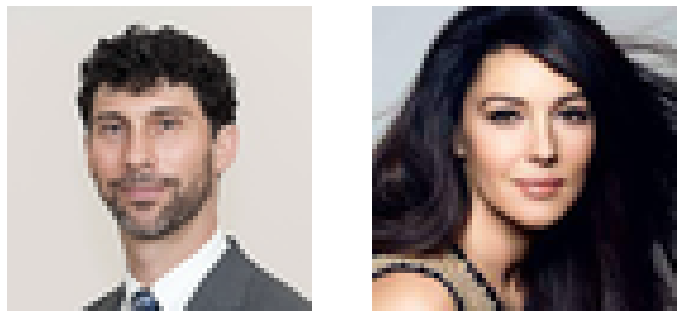

In [46]:
plt.figure(figsize=(12,7))
face1 = Image.open('../../data/test_images/danstein.png')
face1 = face1.resize((64,64),1)
face1_vector = np.reshape(face1,(64*64*3,1)) / 255;
plt.subplot(1,2,1)
plt.imshow(face1);
plt.axis('off')

face2 = Image.open('../../data/test_images/monica.jpg')
face2 = face2.resize((64,64),1)
face2_vector = np.reshape(face2,(64*64*3,1)) / 255;
plt.subplot(1,2,2)
plt.imshow(face2);
plt.axis('off');

### Determine weights on components that best map new image onto the components

In [47]:
W1 = np.dot(np.dot(np.linalg.inv(np.dot(C.T,C)),C.T),face1_vector)
W2 = np.dot(np.dot(np.linalg.inv(np.dot(C.T,C)),C.T),face2_vector)

### Reconstruct from weights

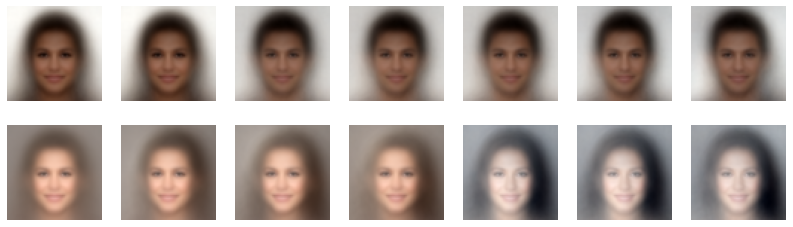

In [54]:
plt.figure(figsize=(16,4))
for i in range(1,8):
    recon_face1 = np.dot(C[:,:i+1],W1[:i+1,:])
    recon_face1 = np.reshape(recon_face1,(64,64,3))
    minval = np.min(recon_face1)
    maxval = np.max(recon_face1)
    maxext = np.max([np.abs(minval),np.abs(maxval)])
    recon_face1 = (recon_face1 / maxext * 0.5) + 0.5
    plt.subplot(2,8,i+1)
    plt.imshow(recon_face1);
    plt.axis('off')
    
    recon_face2 = np.dot(C[:,:i+1],W2[:i+1,:])
    recon_face2 = np.reshape(recon_face2,(64,64,3))
    minval = np.min(recon_face2)
    maxval = np.max(recon_face2)
    maxext = np.max([np.abs(minval),np.abs(maxval)])
    recon_face2 = (recon_face2 / maxext * 0.5) + 0.5
    plt.subplot(2,8,i+9)
    plt.imshow(recon_face2);
    plt.axis('off')    